In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import pairwise_distances
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/home/mllab1/Downloads/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
label_encoder = preprocessing.LabelEncoder()
df['Month'] = label_encoder.fit_transform(df['Month'])
df['VisitorType'] = label_encoder.fit_transform(df['VisitorType'])
df['Weekend'] = label_encoder.fit_transform(df['Weekend'])
df['Revenue'] = label_encoder.fit_transform(df['Revenue'])

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,3.147364,4.069586,1.718329,0.232603,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169,0.690759,0.422509,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,4.000000,4.000000,2.000000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,9.000000,20.000000,2.000000,1.000000,1.000000


In [6]:
print(df.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [7]:
df.Revenue = df.Revenue.astype('int')
df.Weekend = df.Weekend.astype('int')

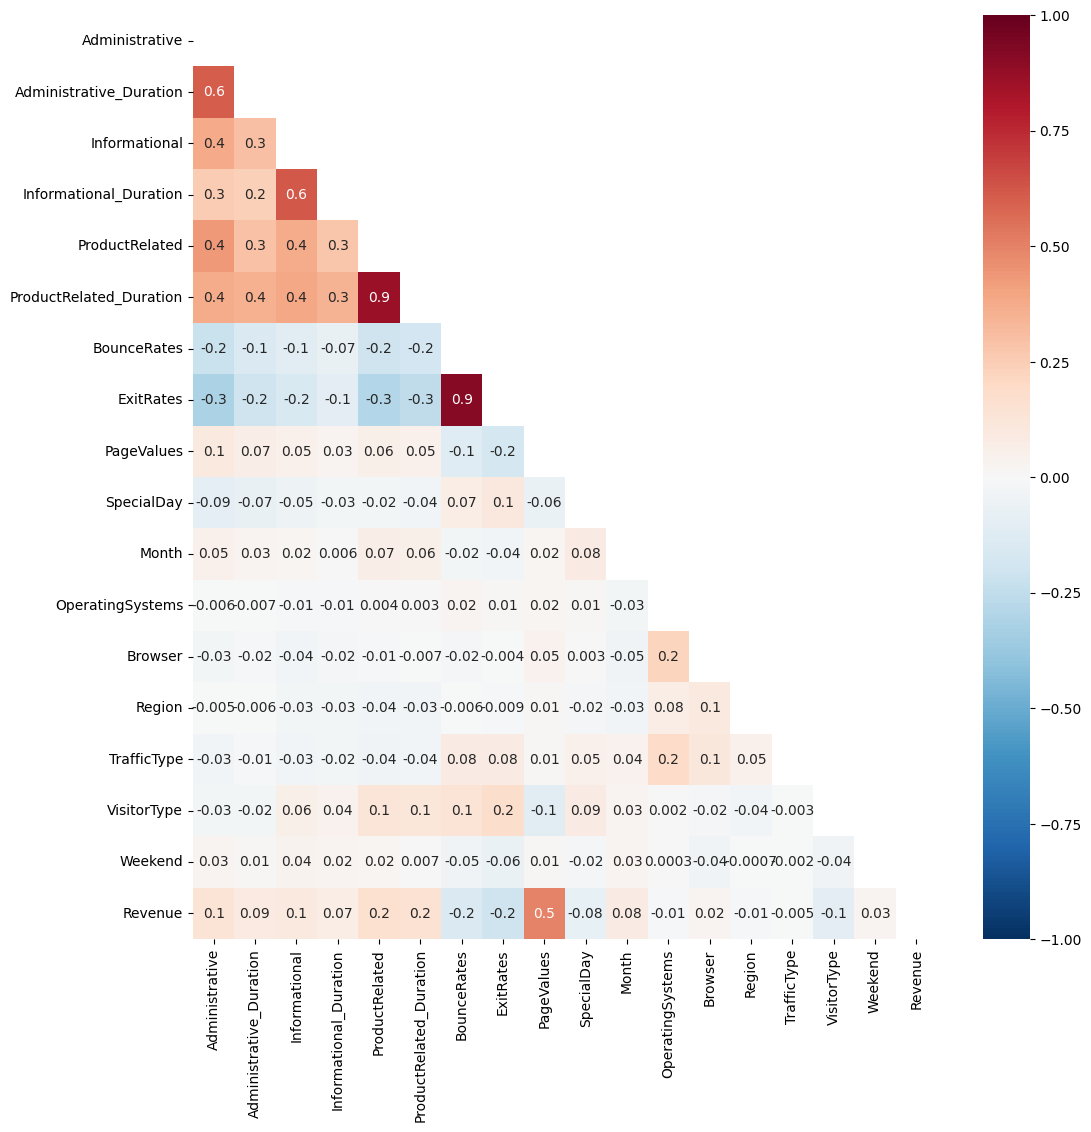

In [8]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()


In [10]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
if len(numeric_columns) > 0:
     #if there are numeric features, normalize or standardize them
     scaler = StandardScaler()
     df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [12]:
categorical_columns = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Revenue', data=df)
    plt.title(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

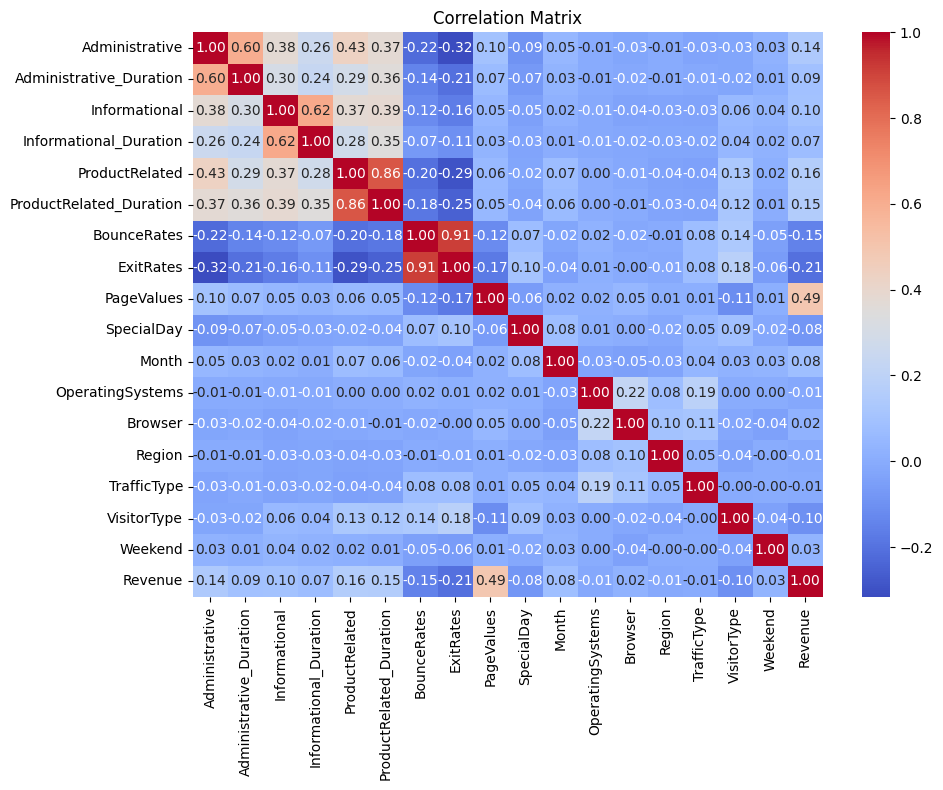

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [14]:
x_o=df.drop('Revenue',axis=1)
y_o=df['Revenue']

In [15]:

x_train_o,x_test_o,y_train_o,y_test_o=train_test_split(x_o,y_o,test_size=0.2,random_state=42,stratify=y_o)

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_o, y_train_o)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
y_pred_o = knn_classifier.predict(x_test_o)

accuracy = accuracy_score(y_test_o, y_pred_o)
print("Accuracy:", accuracy)

Accuracy: 0.870235198702352


In [ ]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [ ]:
knn_classifier = KNNClassifier(k=5)

knn_classifier.fit(x_train_o.values, y_train_o.values)

In [ ]:
y_pred_o = knn_classifier.predict(x_test_o.values)

accuracy = np.mean(y_pred_o == y_test_o.values)
print("Accuracy:", accuracy)

Accuracy: 0.870235198702352


In [ ]:
knn_classifier = KNNClassifier(k=3)
knn_classifier.fit(x_train_o.values, y_train_o.values)

y_pred_o = knn_classifier.predict(x_test_o.values)

accuracy = np.mean(y_pred_o == y_test_o.values)
print("Accuracy:", accuracy)

Accuracy: 0.8722627737226277


In [ ]:
class KNNClassifier:
    def __init__(self, k=5, epochs=1):
        self.k = k
        self.epochs = epochs

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

        for _ in range(self.epochs):
            for x, y in zip(X, y):
                self._update_weights(x, y)

In [ ]:

knn_classifier = KNNClassifier(k=5, epochs=3) 
knn_classifier.fit(x_train_o.values, y_train_o.values)

y_pred_o = knn_classifier.predict(x_test_o.values)

accuracy = np.mean(y_pred_o == y_test_o.values)
print("Accuracy:", accuracy)

Accuracy: 0.870235198702352


[0.8787510137875101, 0.8710462287104623, 0.8787510137875101]


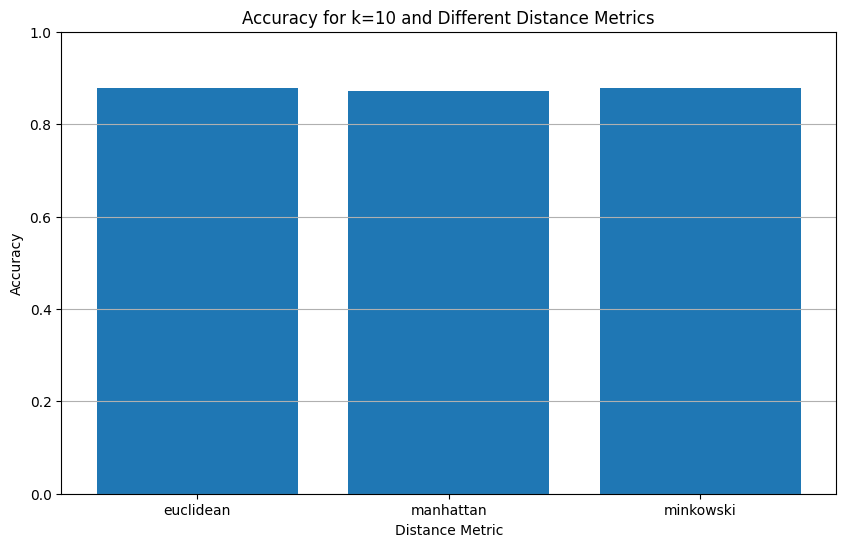

In [ ]:
class KNNClassifier:
    def __init__(self, k=3, distance='Euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_pred = [self._predict(dist) for dist in distances]
        return np.array(y_pred)

    def _predict(self, distances):
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

def evaluate_knn(k, distance_metrics, x_train, y_train, x_test, y_test):
    accuracies = []
    for distance_metric in distance_metrics:
        knn_classifier = KNNClassifier(k=k, distance=distance_metric)
        knn_classifier.fit(x_train, y_train)
        y_pred = knn_classifier.predict(x_test)
        accuracy = np.mean(y_pred == y_test)
        accuracies.append(accuracy)
    return accuracies

k = 10
distance_metrics = ['Euclidean', 'Manhattan', 'Minkowski']

accuracies = evaluate_knn(k, distance_metrics, x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values)

print(accuracies)

plt.figure(figsize=(10, 6))
plt.bar(distance_metrics, accuracies)
plt.title(f'Accuracy for k={k} and Different Distance Metrics')
plt.xlabel('Distance Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
plt.grid(axis='y')
plt.show()


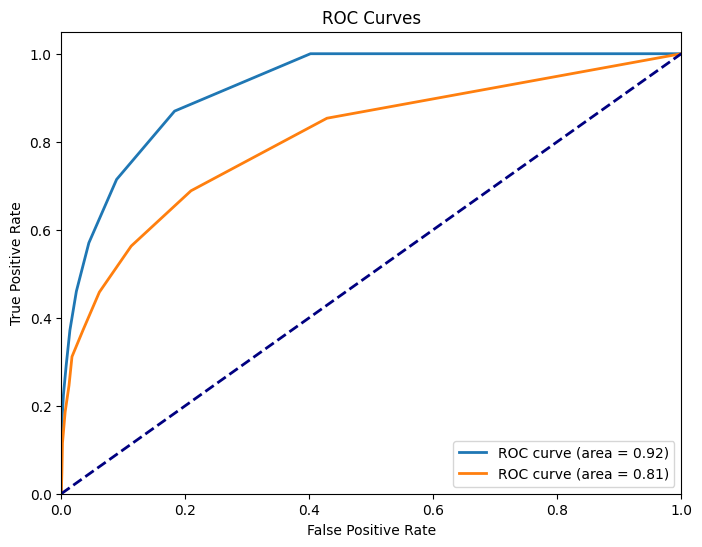

In [ ]:
class KNNClassifier:
    def __init__(self, k=3, distance='Euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_proba(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_probs = []
        for dist in distances:
            k_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            class_probs = [k_nearest_labels.count(c) / self.k for c in np.unique(self.y_train)]
            y_probs.append(class_probs)
        return np.array(y_probs)

def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

def plot_roc_curves(classifier, x_train, y_train, x_test, y_test, title):
    classifier.fit(x_train, y_train)
    y_train_prob = classifier.predict_proba(x_train)[:, 1]
    y_test_prob = classifier.predict_proba(x_test)[:, 1]

    plt.figure(figsize=(8, 6))
    plot_roc_curve(y_train, y_train_prob, f'Training {title} ROC Curve')
    plot_roc_curve(y_test, y_test_prob, f'Testing {title} ROC Curve')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc="lower right")
    plt.show()

knn_classifier = KNNClassifier(k=10, distance='Euclidean')
plot_roc_curves(knn_classifier, x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values, 'KNN Classifier')

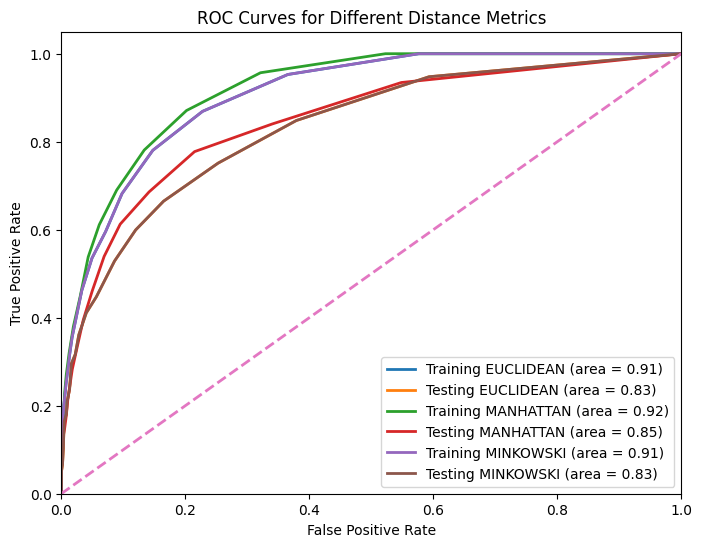

In [ ]:
class KNNClassifier:
    def __init__(self, k=3, distance='Euclidean'):
        self.k = k
        self.distance = distance

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict_proba(self, X):
        distances = pairwise_distances(X, self.X_train, metric=self.distance)
        y_probs = []
        for dist in distances:
            k_indices = np.argsort(dist)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_indices]
            class_probs = [k_nearest_labels.count(c) / self.k for c in np.unique(self.y_train)]
            y_probs.append(class_probs)
        return np.array(y_probs)

def plot_roc_curve(y_true, y_prob, title):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{title} (area = %0.2f)' % roc_auc)

def plot_roc_curves(x_train, y_train, x_test, y_test, k=20):
    distance_metrics = ['Euclidean', 'Manhattan', 'Minkowski']
    plt.figure(figsize=(8, 6))
    
    for distance_metric in distance_metrics:
        knn_classifier = KNNClassifier(k=k, distance=distance_metric)
        knn_classifier.fit(x_train, y_train)
        y_train_prob = knn_classifier.predict_proba(x_train)[:, 1]
        y_test_prob = knn_classifier.predict_proba(x_test)[:, 1]
        plot_roc_curve(y_train, y_train_prob, f'Training {distance_metric.upper()}')
        plot_roc_curve(y_test, y_test_prob, f'Testing {distance_metric.upper()}')

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Different Distance Metrics')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curves(x_train_o.values, y_train_o.values, x_test_o.values, y_test_o.values)